## VSM E1: Word2Vec

This experiment uses word embeddings and a word2vec model to predict scores.

The three primary experiments we need to run are the following.

1. Word2Vec on 6-Class problem
2. Word2Vec in German and Spanish on 6-Class problem

### Hypotheses

1. Does using/increasing the N-Grams increase accuracy and correlation?
2. Does increasing model answers increase accuracy and by how much?
 - Increasing Model Answers should both increase accuracy, recall more-so than precision however.
3. What is the effect of length penalization?
 - Hypothesis: increased precision at cost of lower recall scores.
4. How well does it work across languages? 
 - It should work much more equally than for Knowledge Based Approaches.
 
 
### Notes

1. Word Embeddings in Non-English languages are wikipedia DB dumps taken from : https://github.com/Kyubyong/wordvectors

In [6]:
import sys
sys.path.append('../')
sys.path.append('../../../')
import libs.data as data
import libs.stats as stats
import libs.utils as utils
import libs.preprocessing as pp
import exp_libs.vsm as vsm
import pandas as pd
import numpy as np
import gensim
import spacy
from importlib import reload

In [10]:
df_en = data.load_dataframe('../../../datasets/final/en/asag_v2_en_filter.csv')
display(df_en.head(1))
nlp_en = spacy.load('en')

y_true_en = np.round(df_en['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1   What is the role of a prototype program in pr...   

                                                  MA  \
0   To simulate the behaviour of portions of the ...   

                                                 MA2  \
0  to provide an example and feedback of how the ...   

                                                 MA3  \
0  to serve as a proof of concept and illustrate ...   

                               NA  \
0  to find errors or collect data   

                                                  SA  MyScore  \
0   High risk problems are address in the prototy...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

## Exp. 01: Word-to-Word comparison (Finding Effect of N-Grams)

1. N-Gram Size = 1
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [9]:
# replace with your filepath to the glove-wiki-gigaword-300 file (should be inside $HOME/gensim-data)
model = vsm.load_gensim_model('/home/che/gensim-data/glove-wiki-gigaword-300/glove-wiki-gigaword-300.gz')

In [23]:
reload(vsm)

pipeline_fn = vsm.create_processing_fn(nlp_en, pp.EN_STOPS)
word2word_fn = vsm.create_word_to_word_similarity_function(model)

In [36]:
reload(vsm)
res1 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=1,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.07      0.07      0.07        14
        1.0       0.01      0.25      0.03         8
        2.0       0.19      0.40      0.26       234
        3.0       0.08      0.39      0.13       157
        4.0       0.23      0.15      0.18       676
        5.0       0.83      0.13      0.22       921

avg / total       0.49      0.19      0.20      2010

Pearson's R: 0.4290379295828461
Cohen's Kappa: 0.027331995765452866
MAE: 1.1661691542288557
Accuracy: 18.61%
Precision: 48.92%
Recall: 18.61%
F1-Measure: 20.21%


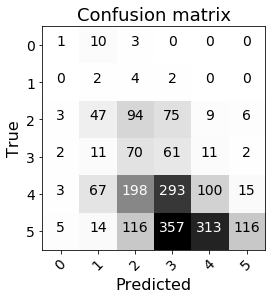

In [37]:
stats.print_all_stats(y_true_en, res1['y_pred'])

exp1_data = stats.get_all_stats(y_true_en, res1['y_pred'])
# %store exp1_data

stats.plot_confusion_matrix(stats.cm(y_true_en, res1['y_pred']), classes=np.arange(6))

In [38]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n1', res1)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n1')

{'y_pred': array([2., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.46826921, 0.79889208, 0.97702769, ..., 0.        , 1.        ,
        0.65428405]),
 'y_pred_raw_all': array([[0.46826921],
        [0.79889208],
        [0.97702769],
        ...,
        [0.        ],
        [1.        ],
        [0.65428405]])}

## Exp. 02: Word-to-Word comparison (Finding Effect of N-Grams N=2)

1. N-Gram Size = 2
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [39]:
reload(vsm)
res2 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=2,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.18      0.21      0.19        14
        1.0       0.01      0.12      0.03         8
        2.0       0.25      0.37      0.29       234
        3.0       0.09      0.49      0.15       157
        4.0       0.25      0.20      0.22       676
        5.0       0.83      0.12      0.21       921

avg / total       0.50      0.21      0.22      2010

Pearson's R: 0.43664135971075624
Cohen's Kappa: 0.03593643576593275
MAE: 0.972636815920398
Accuracy: 20.65%
Precision: 50.34%
Recall: 20.65%
F1-Measure: 21.91%


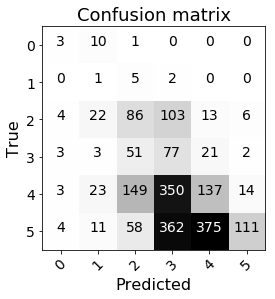

In [40]:
stats.print_all_stats(y_true_en, res2['y_pred'])
exp1_data = stats.get_all_stats(y_true_en, res2['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res2['y_pred']), classes=np.arange(6))

In [41]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n2', res2)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n2')

{'y_pred': array([3., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.54259813, 0.79831734, 0.98109265, ..., 0.        , 1.        ,
        0.68323735]),
 'y_pred_raw_all': array([[0.54259813],
        [0.79831734],
        [0.98109265],
        ...,
        [0.        ],
        [1.        ],
        [0.68323735]])}

## Exp. 03: Word-to-Word comparison (Finding Effect of N-Grams N=3)

1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [42]:
res3 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.38      0.64      0.47        14
        1.0       0.01      0.12      0.02         8
        2.0       0.27      0.25      0.26       234
        3.0       0.10      0.58      0.17       157
        4.0       0.27      0.27      0.27       676
        5.0       0.83      0.11      0.20       921

avg / total       0.51      0.22      0.23      2010

Pearson's R: 0.4329809971391938
Cohen's Kappa: 0.04008266494285184
MAE: 0.8592039800995025
Accuracy: 22.19%
Precision: 51.43%
Recall: 22.19%
F1-Measure: 22.91%


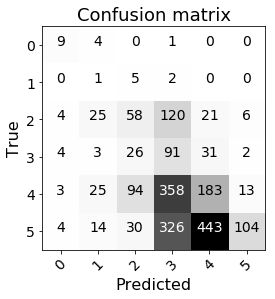

In [43]:
stats.print_all_stats(y_true_en, res3['y_pred'])
exp1_data = stats.get_all_stats(y_true_en, res3['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res3['y_pred']), classes=np.arange(6))

In [44]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n3', res3)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n3')

{'y_pred': array([3., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.58697824, 0.81245259, 0.98406053, ..., 0.        , 1.        ,
        0.68323735]),
 'y_pred_raw_all': array([[0.58697824],
        [0.81245259],
        [0.98406053],
        ...,
        [0.        ],
        [1.        ],
        [0.68323735]])}

## Exp. 04: Word-to-Word comparison (Finding Effect of N-Grams N=4)
1. N-Gram Size = 4
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model = wiki-gigaword-300 (Glove Word2Vec)

In [45]:
res4 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=4,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.34      0.71      0.47        14
        1.0       0.01      0.12      0.02         8
        2.0       0.24      0.15      0.18       234
        3.0       0.11      0.57      0.19       157
        4.0       0.29      0.35      0.32       676
        5.0       0.83      0.11      0.20       921

avg / total       0.52      0.24      0.24      2010

Pearson's R: 0.41347893462683166
Cohen's Kappa: 0.04000702401990652
MAE: 0.7766169154228856
Accuracy: 23.68%
Precision: 51.77%
Recall: 23.68%
F1-Measure: 23.69%


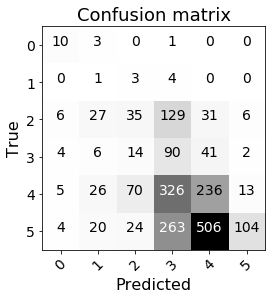

In [46]:
stats.print_all_stats(y_true_en, res4['y_pred'])
exp4_data = stats.get_all_stats(y_true_en, res4['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res4['y_pred']), classes=np.arange(6))

In [47]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n4', res4)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n4')

{'y_pred': array([3., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.61802477, 0.81966089, 0.98574731, ..., 0.        , 1.        ,
        0.68323735]),
 'y_pred_raw_all': array([[0.61802477],
        [0.81966089],
        [0.98574731],
        ...,
        [0.        ],
        [1.        ],
        [0.68323735]])}

### Exp 01-04: N-Gram Summary

1. Increasing N-Grams did nothing but increase the accuracy of the model. 
2. It also (obviously) increased the computational complexity and running time of the algorithm.
3. It shows dimenishing returns after n=3 b/c correlation is dropping.

## Exp. 05: Model Answer comparisons (Finding Effect of Model Answer Sizes MA=2)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 2
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [48]:
res5 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=2,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.35      0.57      0.43        14
        1.0       0.00      0.00      0.00         8
        2.0       0.37      0.16      0.23       234
        3.0       0.12      0.57      0.19       157
        4.0       0.31      0.41      0.35       676
        5.0       0.85      0.17      0.28       921

avg / total       0.55      0.28      0.29      2010

Pearson's R: 0.4749648379754469
Cohen's Kappa: 0.07068778210131677
MAE: 0.6059701492537314
Accuracy: 28.16%
Precision: 54.65%
Recall: 28.16%
F1-Measure: 29.15%


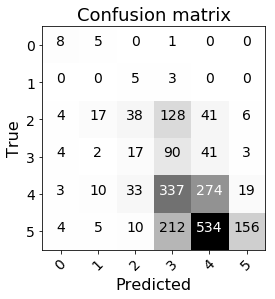

In [49]:
stats.print_all_stats(y_true_en, res5['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res5['y_pred']), classes=np.arange(6))

In [50]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n3_ma2', res5)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma2')

{'y_pred': array([4., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.70710337, 0.81245259, 0.98406053, ..., 0.        , 1.        ,
        0.68323735]),
 'y_pred_raw_all': array([[0.58697824, 0.70710337],
        [0.81245259, 0.7084669 ],
        [0.98406053, 0.65256856],
        ...,
        [0.        , 0.        ],
        [1.        , 0.69962648],
        [0.68323735, 0.44306981]])}

## Exp. 06: Model Answer comparisons (Finding Effect of Model Answer Sizes MA=3)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 3
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [51]:
res6 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn, 
                          ngram_size=3,
                          ma_count=3,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.40      0.57      0.47        14
        1.0       0.00      0.00      0.00         8
        2.0       0.44      0.15      0.23       234
        3.0       0.13      0.53      0.21       157
        4.0       0.34      0.49      0.40       676
        5.0       0.83      0.22      0.35       921

avg / total       0.56      0.33      0.34      2010

Pearson's R: 0.4804580060078494
Cohen's Kappa: 0.10616508175705586
MAE: 0.48059701492537316
Accuracy: 32.94%
Precision: 56.04%
Recall: 32.94%
F1-Measure: 34.01%


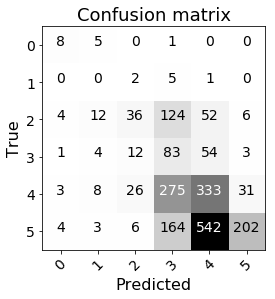

In [56]:
stats.print_all_stats(y_true_en, res6['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res6['y_pred']), classes=np.arange(6))

In [53]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n3_ma3', res6)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma3')

{'y_pred': array([4., 4., 5., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.70710337, 0.81245259, 0.98406053, ..., 0.        , 1.        ,
        0.68323735]),
 'y_pred_raw_all': array([[0.58697824, 0.70710337, 0.62689759],
        [0.81245259, 0.7084669 , 0.63569124],
        [0.98406053, 0.65256856, 0.50541165],
        ...,
        [0.        , 0.        , 0.        ],
        [1.        , 0.69962648, 0.69962648],
        [0.68323735, 0.44306981, 0.44306981]])}

### Exp 05-06: Model Answer Summary

1. Increasing model answers had the effect: increased accuracy, precision, recall, kappa, pearson's R.
2. Increased computational complexity and running time.
3. Saw a boost in accuracy of about 10% by adding 2 model answers. Bigger boost for 1st model answer than for second.

## Exp. 07: Assessing the Effect of Length Penalization
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = Yes
4. Model Answer Count = 1
5. Model = wiki-gigaword-300 (Glove Word2Vec)

In [57]:
res7 = vsm.run_experiment(df_en,
                          pipeline_fn,
                          sim_fn=word2word_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=True)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.09      0.64      0.16        14
        1.0       0.00      0.00      0.00         8
        2.0       0.15      0.35      0.21       234
        3.0       0.08      0.36      0.13       157
        4.0       0.30      0.11      0.16       676
        5.0       0.73      0.03      0.06       921

avg / total       0.46      0.12      0.11      2010

Pearson's R: 0.16154625658979138
Cohen's Kappa: 0.01591050858734977
MAE: 1.772139303482587
Accuracy: 12.14%
Precision: 46.10%
Recall: 12.14%
F1-Measure: 11.39%


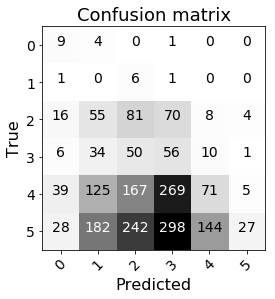

In [58]:
stats.print_all_stats(y_true_en, res7['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_en, res7['y_pred']), classes=np.arange(6))

In [65]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_en_n3_ma1_length_penalize', res7)
data.load('../tmp/vsm/vsm_e1_word2vec_en_n3_ma1_length_penalize')

{'y_pred': array([1., 1., 2., ..., 0., 1., 0.]),
 'y_pred_raw': array([0.16304951, 0.22568127, 0.49203026, ..., 0.        , 0.2       ,
        0.06211249]),
 'y_pred_raw_all': array([[0.16304951],
        [0.22568127],
        [0.49203026],
        ...,
        [0.        ],
        [0.2       ],
        [0.06211249]])}

### Exp. 07: Length Penalization Summary 

1. No Length Penalization: Recall=22%, Precision=51%, r=0.43, k=0.04
2. With Length Penalization: Recall=12%, Precision=46%, r=0.16, k=0.02
3. Result: Significantly worse on all counts.

Length penalization counts extra words in the student response against them. However, many responses contain extra information which is not bad. For instance, 43% of student responses have "extra info" while having a score above 3 (out of 5).

Length penalization doesn't make much sense given this information. What would make sense is somehow looking inside this extra information to determine if it contains false assertions or contradictory information and downgrading a score based on this.

In [64]:
len(df_en[np.logical_and(df_en['Feedback_Notes'].str.contains('extra_info'), df_en['MyScore'] > 3)]) / len(df_en)

0.42835820895522386

## Exp. 08: Cross-Language Comparison (Language = Spanish)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 1
5. Language = Spanish
5. Model = wiki-300 (Word2Vec Spanish)

In [77]:
df_es = data.load_dataframe('../../../datasets/final/es/asag_v2_es_filter.csv')
display(df_es.head(1))
nlp_es = spacy.load('es')
y_true_es = np.round(df_es['Score'].as_matrix())

ID  AID  QID                                             Prompt  \
0  1.1    1    1  ¿Cuál es el papel de un programa prototipo en ...   

                                                  MA  \
0  Para simular el comportamiento de porciones de...   

                                                 MA2  \
0  para proporcionar un ejemplo y retroalimentaci...   

                                                 MA3  \
0  para servir como prueba de concepto e ilustrar...   

                                         NA  \
0  para encontrar errores o recopilar datos   

                                                  SA  MyScore  \
0  Los problemas de alto riesgo se abordan en el ...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [73]:
pipeline_es_fn = vsm.create_processing_fn(nlp_es, pp.ES_STOPS)
word2word_es_fn = vsm.create_word_to_word_similarity_function(model_es)

In [69]:
model_es = vsm.load_word2vec('../../../vector_models/small_models/es/w2v/es.bin')

In [74]:
res8 = vsm.run_experiment(df_es,
                          pipeline_es_fn,
                          sim_fn=word2word_es_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.41      0.93      0.57        14
        1.0       0.03      0.50      0.07         8
        2.0       0.18      0.37      0.24       234
        3.0       0.08      0.45      0.13       157
        4.0       0.24      0.13      0.17       676
        5.0       0.91      0.06      0.12       921

avg / total       0.52      0.16      0.15      2010

Pearson's R: 0.4172386611571568
Cohen's Kappa: 0.020706032310929823
MAE: 1.2681592039800995
Accuracy: 15.87%
Precision: 52.43%
Recall: 15.87%
F1-Measure: 15.19%


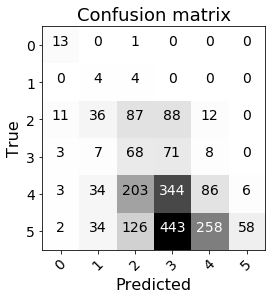

In [78]:
stats.print_all_stats(y_true_es, res8['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_es, res8['y_pred']), classes=np.arange(6))

In [76]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_es_n3_ma1', res8)
data.load('../tmp/vsm/vsm_e1_word2vec_es_n3_ma1')

{'y_pred': array([3., 4., 4., ..., 0., 5., 3.]),
 'y_pred_raw': array([0.56667265, 0.75055549, 0.8275161 , ..., 0.        , 1.        ,
        0.65896748]),
 'y_pred_raw_all': array([[0.56667265],
        [0.75055549],
        [0.8275161 ],
        ...,
        [0.        ],
        [1.        ],
        [0.65896748]])}

## Exp. 09: Cross-Language Comparison (Language = German)
1. N-Gram Size = 3
2. Comparisons = Word-to-Word
3. Length Penalization = No
4. Model Answer Count = 1
5. Language = German
5. Model = wiki-300 (Word2Vec German)

In [79]:
df_de = data.load_dataframe('../../../datasets/final/de/asag_v2_de_filter.csv')
display(df_de.head(1))
nlp_de = spacy.load('de')
y_true_de = np.round(df_de['Score'].as_matrix())

model_de = vsm.load_word2vec('../../../vector_models/small_models/de/w2v/de.bin')

pipeline_de_fn = vsm.create_processing_fn(nlp_de, pp.DE_STOPS)
word2word_de_fn = vsm.create_word_to_word_similarity_function(model_de)

ID  AID  QID                                             Prompt  \
0  1.1    1    1  Welche Rolle spielt ein Prototyp-Programm bei ...   

                                                  MA  \
0  Um das Verhalten von Teilen des gewünschten So...   

                                                 MA2  \
0  um ein Beispiel und Feedback zur Funktionsweis...   

                                                 MA3  \
0  als Konzeptnachweis dienen und veranschauliche...   

                                          NA  \
0  um Fehler zu finden oder Daten zu sammeln   

                                                  SA  MyScore  \
0  In dem Prototyp-Programm werden Probleme mit h...        4   

           Feedback Feedback_Notes  Score  Class3_Score  Class2_Score  
0  correct_indirect            NaN    3.5             2             1

In [80]:
res9 = vsm.run_experiment(df_de,
                          pipeline_de_fn,
                          sim_fn=word2word_de_fn,
                          ngram_size=3,
                          ma_count=1,
                          length_penalize=False)

/home/che/anaconda3/lib/python3.6/site-packages/gensim/matutils.py:737: FutureWarning: Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.
  if np.issubdtype(vec.dtype, np.int):


             precision    recall  f1-score   support

        0.0       0.09      0.86      0.16        14
        1.0       0.02      0.62      0.03         8
        2.0       0.15      0.44      0.22       234
        3.0       0.07      0.29      0.11       157
        4.0       0.12      0.03      0.05       676
        5.0       0.95      0.04      0.09       921

avg / total       0.50      0.11      0.09      2010

Pearson's R: 0.2935788379239876
Cohen's Kappa: 0.008934086753920711
MAE: 1.8422885572139303
Accuracy: 11.24%
Precision: 50.07%
Recall: 11.24%
F1-Measure: 9.07%


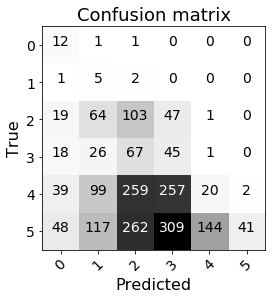

In [81]:
stats.print_all_stats(y_true_de, res9['y_pred'])
stats.plot_confusion_matrix(stats.cm(y_true_de, res9['y_pred']), classes=np.arange(6))

In [82]:
## Store Results
data.save('../tmp/vsm/vsm_e1_word2vec_de_n3_ma1', res9)
data.load('../tmp/vsm/vsm_e1_word2vec_de_n3_ma1')

{'y_pred': array([2., 3., 4., ..., 0., 5., 2.]),
 'y_pred_raw': array([0.49710843, 0.6110098 , 0.83176294, ..., 0.        , 1.        ,
        0.37631347]),
 'y_pred_raw_all': array([[0.49710843],
        [0.6110098 ],
        [0.83176294],
        ...,
        [0.        ],
        [1.        ],
        [0.37631347]])}

### Summary: 08-09

1. Foreign Languages perform generally significantly worse than English.
2. Reasons for this: Different Word Embedding Databases.
3. Library Maturity: Spacy for Spanish and German has lower quality than for English for POS Tagging, Tokenization, Dep Parsing, etc.
4. Translation Problems on the Dataset: I am not a native speaker in English or German, could be making translation mistakes.
5. How could I correct all this?
  - Use Native Speakers.
  - Run experiments to assess the difference in quality of each of the tools in the NLP Pipeline, to determine how much is due to tooling.
  - Use documents to train word embeddings where all documents cover the same topics and are done by native speakers, thus maximizing the similarity of the Word Embedding models.
  - Create a Stembord Course in English and have a native speaker translate the questions to the target language, for instance, Spanish or German. Then use native speakers to take the course in Spanish/German and compare with native speaker results from the English course.